In [85]:
import pandas as pd 
import numpy as np 
from scipy.stats import norm
import datetime
import holidays 
import matplotlib.pyplot as plt

## Wczytanie csv

In [261]:
prompt_games = pd.read_csv('../../config/prompts/gry.csv')
prompt_first_names_males = pd.read_csv('../../config/prompts/imiona_m.csv')
prompt_last_names_males = pd.read_csv('../../config/prompts/nazwiska_m.csv')
prompt_first_names_females = pd.read_csv('../../config/prompts/imiona_k.csv')
prompt_last_names_females = pd.read_csv('../../config/prompts/nazwiska_k.csv')
prompt_cities = pd.read_csv('../../config/prompts/Miasta.csv')

In [262]:
prompt_first_names_males

,Unnamed: 0,IMIĘ PIERWSZE,PŁEĆ,LICZBA WYSTĄPIEŃ,prawdopodobieństwo
0,0,PIOTR,MĘŻCZYZNA,692120,3.291829e-02
1,1,KRZYSZTOF,MĘŻCZYZNA,645674,3.070925e-02
2,2,ANDRZEJ,MĘŻCZYZNA,542386,2.579671e-02
3,3,TOMASZ,MĘŻCZYZNA,538080,2.559191e-02
4,4,PAWEŁ,MĘŻCZYZNA,507624,2.414338e-02
...,...,...,...,...,...
32140,32140,ZHANN,MĘŻCZYZNA,2,9.512307e-08
32141,32141,RASLAN,MĘŻCZYZNA,2,9.512307e-08
32142,32142,FEDUN,MĘŻCZYZNA,2,9.512307e-08
32143,32143,KHETAG,MĘŻCZYZNA,2,9.512307e-08


In [258]:
# prompt_first_names_males['prawdopodobieństwo'] = [prompt_first_names_males['LICZBA WYSTĄPIEŃ'][i]/sum(prompt_first_names_males['LICZBA WYSTĄPIEŃ']) for i in range(len(prompt_first_names_males['LICZBA WYSTĄPIEŃ']))]
# prompt_first_names_females['prawdopodobieństwo'] = [prompt_first_names_females['LICZBA WYSTĄPIEŃ'][i]/sum(prompt_first_names_females['LICZBA WYSTĄPIEŃ']) for i in range(len(prompt_first_names_females['LICZBA WYSTĄPIEŃ']))]
# prompt_last_names_males['prawdopodobieństwo'] = [prompt_last_names_males['Liczba'][i]/sum(prompt_last_names_males['Liczba']) for i in range(len(prompt_last_names_males['Liczba']))]
# prompt_last_names_females['prawdopodobieństwo'] = [prompt_last_names_females['Liczba'][i]/sum(prompt_last_names_females['Liczba']) for i in range(len(prompt_last_names_females['Liczba']))]

In [260]:
# prompt_first_names_males.to_csv('../../config/prompts/imiona_m.csv')
# prompt_first_names_females.to_csv('../../config/prompts/imiona_k.csv')
# prompt_last_names_males.to_csv('../../config/prompts/nazwiska_m.csv')
# prompt_last_names_females.to_csv('../../config/prompts/nazwiska_k.csv')

## Tabela prompt_dates

In [95]:
shop_open_date = datetime.datetime(2021,6,1) #Dzień Dziecka bo tak 
today = datetime.datetime(2023,6,25)

In [96]:
weekday_dict = {'0':'Poniedziałek', '1':'Wtorek', '2':'Środa', '3':'Czwartek', '4':'Piątek', '5':'Sobota'}

def gen_dates(start_date, end_date):
    dates = []
    holidays_pl = holidays.Poland()
    current_date = start_date
    while current_date <= end_date:
        if current_date.weekday() != 6 and current_date not in holidays_pl:
            dates.append((current_date.date().strftime("%d-%m-%Y"), weekday_dict[str(current_date.weekday())]))
        current_date += datetime.timedelta(days=1)
    return dates

In [97]:
generated_dates = gen_dates(shop_open_date, today)

In [98]:
prompt_dates = pd.DataFrame(generated_dates, columns=['Data', 'Dzień tygodnia'])

## Ruch - dni

In [99]:
A = 6
B = 0.01 
dodatek_dzienny = {'Poniedziałek':'2', 'Wtorek':'1', 'Środa':'0', 'Czwartek':'4', 'Piątek':'5', 'Sobota':'5'}

volume_base = []
for i in range(len(prompt_dates['Dzień tygodnia'])):
    dd = int(dodatek_dzienny[prompt_dates['Dzień tygodnia'][i]])
    volume_base.append(A+B*i+dd)

In [100]:
prompt_dates['volume_base'] = volume_base

In [160]:
volume_sales = []
for v_base in prompt_dates['volume_base']:
    szum = round(norm.rvs(0,1.5))
    volume_sales.append(max(0,v_base+szum))

prompt_dates['volume_sales'] = volume_sales

In [161]:
volume_rental = []
for v_base in prompt_dates['volume_base']:
    szum = round(norm.rvs(0,1.5))
    volume_rental.append(max(0,0.4*v_base+szum))

prompt_dates['volume_rental'] = volume_rental

In [162]:
prompt_dates

,Data,Dzień tygodnia,volume_base,volume_sales,volume_rental
0,01-06-2021,Wtorek,7.00,7.00,2.800
1,02-06-2021,Środa,6.01,5.01,0.404
2,04-06-2021,Piątek,11.02,10.02,4.408
3,05-06-2021,Sobota,11.03,12.03,5.412
4,07-06-2021,Poniedziałek,8.04,6.04,3.216
...,...,...,...,...,...
624,20-06-2023,Wtorek,13.24,13.24,6.296
625,21-06-2023,Środa,12.25,11.25,3.900
626,22-06-2023,Czwartek,16.26,17.26,7.504
627,23-06-2023,Piątek,17.27,20.27,5.908


## Tabela procentowa z godzinami

In [219]:
hours = []
for i in range(8,20):
    if i < 18:
        hours.append((i, round(expon.rvs(i/2))))
    else:
        hours.append((i, round(expon.cdf(i/3))))          

In [220]:
hours_prompt = pd.DataFrame(hours, columns=['Godzina', 'Ilość klientów'])

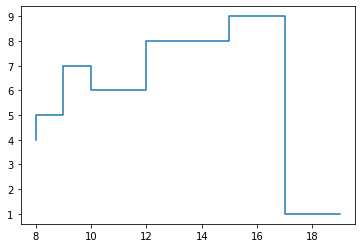

In [221]:
plt.step(range(8,20),hours_prompt['Ilość klientów'])

In [222]:
hours_prompt['Natężenie'] = [hours_prompt['Ilość klientów'][i]/sum(hours_prompt['Ilość klientów']) for i in range(len(hours_prompt['Godzina']))]

In [223]:
sum(hours_prompt['Natężenie'])

0.9999999999999998

## Gry

In [183]:
prompt_games[1:] = prompt_games[1:].sample(frac = 1)

In [185]:
prompt_games

,Nazwa,rodzaj,kategoria,opis,Turniej,Kupno,Wypożyczenie,Liczba uczestników
0,Jamniki,planszowa,familijna,"Podczas gry Twój jamnik będzie rósł, musisz wi...",NIE,59.99,NaN,NaN
1,Jenga,inna,zręcznościowa,Cel gry jest prosty – musisz zostać ostatnim g...,TAK,59.94,4.0,2+
2,Mastermind,planszowa,logiczna,Mastermind to gra znana chyba każdemu fanowi g...,TAK,26.19,NaN,2
3,Mistakos,inna,zręcznościowa,"Mistakos Krzesła, w wersji dla 3 osób, zachwyc...",NIE,44.99,NaN,NaN
4,Ego,inna,towarzyska,"Ego to kultowa gra towarzyska, która z pewnośc...",NIE,59.90,NaN,NaN
5,Czarne Historie,karciana,towarzyska,"Czarne historie to zestaw 50 elektryzujących, ...",NIE,30.90,8.0,NaN
6,Cyklady: Monumenty,planszowa,strategiczna,Wybierz się w podróż do archipelagu Cyklady w ...,NIE,38.20,22.0,NaN
7,Story Cubes,planszowa,narracyjna,Oto prosta w założeniach i jednocześnie genial...,NIE,45.88,5.0,NaN
8,Pędzące Żółwie,planszowa,familijna,Celem gry “Pędzące żółwie” jest doprowadzenie ...,NIE,48.74,NaN,NaN
9,Ekosystem,karciana,familijna,Gra pełna harmonii i równowagi. Jak w przyrodz...,NIE,54.03,7.0,NaN


In [249]:
wagi = expon.pdf(x=np.linspace(0,2,len(prompt_games['Nazwa'])),loc=-1/9)
prompt_games['wagi'] = [wagi[i]/np.sum(wagi) for i in range(len(wagi))]

In [251]:
sum(prompt_games['wagi'])

1.0000000000000002

_______________

## Pracownicy